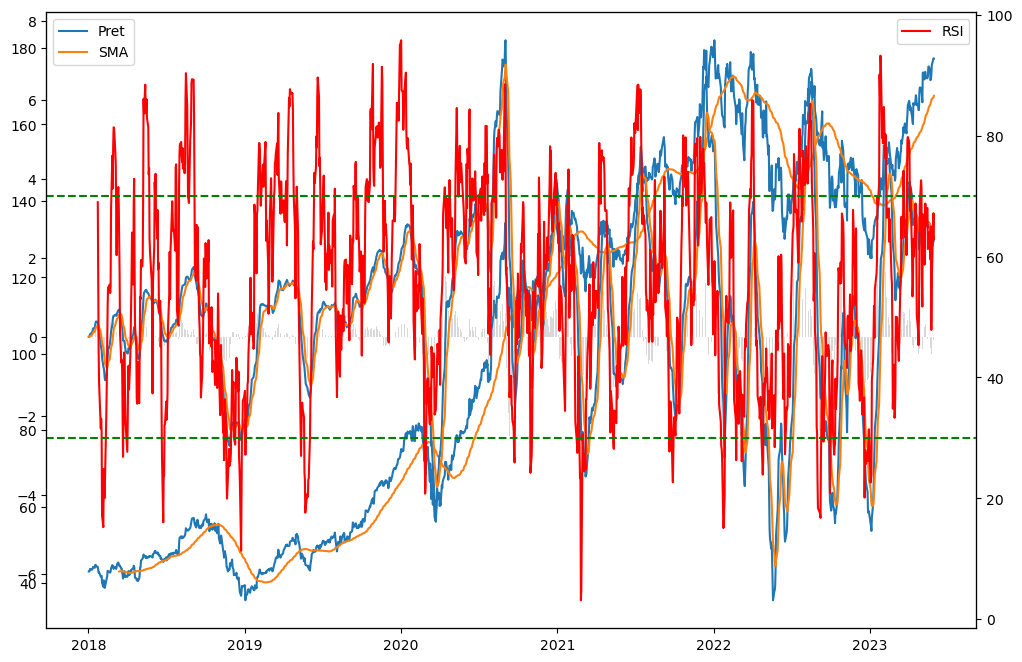

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Descarcarea datelor de preț de pe Yahoo Finance
ticker = 'AAPL'  # Schimbați tickerul după nevoie
start_date = '2018-01-01'  # Schimbați data de început după nevoie
end_date = '2023-06-01'  # Schimbați data de sfârșit după nevoie

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Calculul mediei mobile simple (SMA)
def calculate_sma(data, window):
    sma = data['Close'].rolling(window=window).mean()
    return sma

# Calculul divergenței și a convergenței mediei mobile (MACD)
def calculate_macd(data, short_window, long_window, signal_window):
    ema_short = data['Close'].ewm(span=short_window, adjust=False).mean()
    ema_long = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = ema_short - ema_long
    macd_signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd_line - macd_signal_line
    return macd_line, macd_signal_line, macd_histogram

# Calculul indicelui de forță relativă (RSI)
def calculate_rsi(data, window):
    price_diff = data['Close'].diff()
    up_prices = price_diff.copy()
    down_prices = price_diff.copy()
    up_prices[up_prices < 0] = 0
    down_prices[down_prices > 0] = 0
    avg_gain = up_prices.rolling(window=window).mean()
    avg_loss = abs(down_prices.rolling(window=window).mean())
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculul mediei mobile simple pe 50 de perioade
data['SMA'] = calculate_sma(data, 50)

# Calculul MACD cu parametrii 12, 26, 9
data['MACD'], data['Signal Line'], data['MACD Histogram'] = calculate_macd(data, 12, 26, 9)

# Calculul RSI pe 14 perioade
data['RSI'] = calculate_rsi(data, 14)

# Trasarea graficului prețurilor și indicatorilor
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Pret')
plt.plot(data.index, data['SMA'], label='SMA')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(data.index, data['MACD'], label='MACD')
plt.plot(data.index, data['Signal Line'], label='Signal Line')
plt.bar(data.index, data['MACD Histogram'], label='MACD Histogram', color='gray', alpha=0.3)
plt.twinx()
plt.plot(data.index, data['RSI'], label='RSI', color='red')
plt.axhline(30, color='green', linestyle='--')
plt.axhline(70, color='green', linestyle='--')
plt.legend(loc='upper right')
plt.show()


In [4]:
import pandas as pd
#!pip install yahoo_fin
from yahoo_fin import stock_info as si

# Obținerea sectorului de activitate și competitorii unei companii
ticker = 'AAPL'  # Schimbați tickerul companiei după nevoie

# Obținerea sectorului de activitate al companiei
quote_table = si.get_quote_table(ticker)
sector = quote_table['Sector(s)']

# Obținerea listei de competitori
competitors = si.get_other_info(ticker)['Competitors']

# Afișarea sectorului de activitate și competitorilor
print("Sectorul de activitate al companiei", ticker, "este:", sector)
print("Competitorii companiei", ticker, "sunt:", competitors)


C:\Users\mhcrn\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
C:\Users\mhcrn\anaconda3\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


KeyError: 'Sector(s)'

In [5]:
symbol = 'AAPL'  # Example with Apple stock

# Download financial data using yf.Ticker()
stock = yf.Ticker(symbol)

# Extract financial data
financials = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

# Print the extracted financial data
print("Financials:")
print(financials)
print("\nBalance Sheet:")
print(balance_sheet)
print("\nCash Flow:")
print(cash_flow)

Financials:
                                                        2022-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.162045   
Normalized EBITDA                                   130541000000.0   
Net Income From Continuing Operation Net Minori...   99803000000.0   
Reconciled Depreciation                              11104000000.0   
Reconciled Cost Of Revenue                          223546000000.0   
EBIT                                                119437000000.0   
Net Interest Income                                   -106000000.0   
Interest Expense                                      2931000000.0   
Interest Income                                       2825000000.0   
Normalized Income                                    99803000000.0   
Net Income From Continuing And Discontinued Ope...   99803000000.0   
Total Expenses                                      274891000000.0   
Total Op

In [6]:
import yfinance as yf

# Descărcăm datele de preț pentru un set de acțiuni
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB']  # Exemplu de simboluri de acțiuni
data = yf.download(symbols, start='2022-01-01', end='2022-12-31', group_by='ticker')

# Calculăm procentul de schimbare a prețului pe parcursul perioadei selectate
change_percent = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100

# Sortăm acțiunile în funcție de procentul de schimbare descrescător
sorted_symbols = change_percent.sort_values(ascending=True)

# Afișăm acțiunile cu cele mai mari scăderi
print("Acțiunile cu cele mai mari scăderi:")
for symbol in sorted_symbols.index[:5]:  # Afișăm primele 5 acțiuni cu cele mai mari scăderi
    print(symbol)


[*********************100%***********************]  5 of 5 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


KeyError: 'Close'

In [8]:
!pip install newspaper3k

     -------------------------------------- 211.1/211.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13566 sha256=b1fd6c6a82c1d5d0734cfd3f1fbb5b7430b81ad293fb0bdc3f6851902d1d2a56
  Stored in directory: c:\users\mhcrn\appdata\local\pip\cache\wheels\9e\14\bb\6f49188191db1acb539a457f2870a07a85f077526b9ad458cd
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3358 sha256=cbfbc3e98d0788e2ad6115bf30df343b89035045a05de885748caa3be3aa8cd3
  Stored in directory: c:\users\mhcrn\appdata\local\pip\cache\wheels\15\21\7d\18b75fa5

In [9]:
from newspaper import Config, Article
#!pip install newspaper3k
# Configurăm biblioteca pentru a evita anumite erori legate de site-uri specifice
config = Config()
config.browser_user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'

# Definim URL-ul site-ului de știri de unde dorim să descărcăm articole
url = 'https://www.example.com'  # Exemplu de URL al unui site de știri

# Descărcăm și analizăm articolele de știri de pe site
articles = []

try:
    paper = newspaper.build(url, config=config)
    for article in paper.articles:
        article.download()
        article.parse()
        articles.append(article)
except newspaper.ArticleException:
    print("Nu s-a putut descărca știrile de pe site.")

# Afișăm titlurile și conținutul articolelor
for article in articles:
    print("Titlu:", article.title)
    print("Conținut:", article.text)
    print("---------------")


NameError: name 'newspaper' is not defined

In [10]:
import newspaper
cnn_paper = newspaper.build('http://cnn.com')
for article in cnn_paper.articles:
     print(article.url)

https://edition.cnn.com/business/media
https://edition.cnn.com/travel/news
http://cnn.com/2023/06/29/politics/affirmative-action-supreme-court-ruling/index.html
http://cnn.com/2023/06/28/europe/wagner-prigozhin-rebellion-capture-attempt-intl/index.html
http://cnn.com/2023/06/29/europe/nanterre-france-police-shooting-protests-intl-hnk/index.html
http://cnn.com/2023/06/29/investing/donald-trump-spac-truth-social-insider-trading/index.html
http://cnn.com/2023/06/29/middleeast/baghdad-swedish-embassy-intl/index.html
http://cnn.com/2023/06/29/entertainment/madonna-hospital/index.html
http://cnn.com/2023/06/29/sport/caroline-wozniacki-tennis-return-spt-intl/index.html
http://cnn.com/2023/06/29/health/beans-longevity-blue-zone-wellness/index.html
http://cnn.com/2023/06/29/world/virgin-galactic-launch-italian-air-force-scn/index.html
http://cnn.com/travel/article/hornelen-via-ferrata-climbing-route-mountain-norway/index.html
https://edition.cnn.com/europe/live-news/russia-ukraine-war-news-06-3

In [13]:
sina_paper = newspaper.build('http://www.lemonde.fr/', language='fr')
#print(sina_paper.size())
for article in sina_paper.articles:
    print(article.url)

https://www.lemonde.fr/societe/article/2023/06/29/mort-de-nahel-a-nanterre-le-recul-des-forces-de-l-ordre-face-a-des-emeutiers-determines-lors-d-une-deuxieme-nuit-de-violences_6179711_3224.html


In [14]:
bursa = newspaper.build('http://www.bursa.ro/', language='ro')
#print(sina_paper.size())
for article in bursa.articles:
    print(article.url)

https://ro.xtb.com/investeste-in-actiuni-cu-detinere-cu-0-comision?utm_source=0_comision&utm_medium=banner&utm_campaign=bursa_300x250
http://www.bursa.ro/conferinta-piata-financiar-bancara-efecte-ale-listarii-hidroelectrica-asupra-pietei-noastre-de-capital-00901055
http://www.bursa.ro/inflatia-din-spania-a-coborat-sub-tinta-bce-84901059
http://www.bursa.ro/dezindustrializarea-germaniei-se-accelereaza-pe-fondul-iesirilor-record-ale-capitalurilor-47901052
http://www.bursa.ro/consiliul-concurentei-plafonarea-adaosului-comercial-la-alimentele-de-baza-plina-de-riscuri-89901054
http://www.bursa.ro/udmr-nedorita-in-viitorul-parlament-de-coalitia-psd-pnl-69801053
http://www.bursa.ro/centru-de-mentenanta-pentru-elicopterele-black-hawk-la-bacau-42901057
http://www.bursa.ro/ministrul-educatiei-partial-nemultumit-de-rezultatele-de-la-evaluarea-nationala-28701051
http://www.bursa.ro/transportul-in-comun-subiect-de-expozitie-49701052
http://www.bursa.ro/mosii-de-vara-la-muzeul-satului-01801055
http:

In [16]:
!pip install googlesearch-python

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4224 sha256=ce5b0ed061e53c74454904ca88b5b2c50c44cefe67d026f75c7fa24a1a6b6fd8
  Stored in directory: c:\users\mhcrn\appdata\local\pip\cache\wheels\b1\3b\75\444f247f5cbb6f44804aef28e92d811176a868e05dfd61f9cf
Successfully built googlesearch-python


In [19]:
from googlesearch import search

# Define the search query
query = "analiza.pdf"  # Replace with your desired search query

# Perform the Google search
search_results = search(query, num_results=10, filetype='pdf')

# Print the URLs of the PDF articles
for url in search_results:
    print(url)


TypeError: search() got an unexpected keyword argument 'filetype'

In [20]:
import requests
from bs4 import BeautifulSoup
from googlesearch import search

# Define the query to search for PDF articles
query = "your search query here"  # Replace with your desired search query

# Perform a Google search
search_results = search(query, num_results=10, lang="en")

# Function to download PDF files from URLs
def download_pdf(url, file_name):
    response = requests.get(url)
    with open(file_name, 'wb') as file:
        file.write(response.content)

# Search for PDF articles and download them
pdf_links = []
for url in search_results:
    if url.endswith('.pdf'):
        pdf_links.append(url)

# Download the PDF articles
for i, pdf_url in enumerate(pdf_links):
    file_name = f'article_{i + 1}.pdf'
    download_pdf(pdf_url, file_name)
    print(f'Downloaded {file_name}')


In [21]:
import requests

# Define the file URL
file_url = "https://example.com/file.pdf"  # Replace with the URL of the file you want to download

# Send a GET request to the file URL
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the file name from the URL
    file_name = file_url.split("/")[-1]

    # Write the file content to disk
    with open(file_name, "wb") as file:
        file.write(response.content)

    print(f"File {file_name} downloaded successfully.")
else:
    print("Failed to download the file.")

Failed to download the file.


In [22]:
import requests

# Define the URL of the FED analysis PDF
url = "https://www.federalreserve.gov/analysis/analyticalnotes/your_analytical_note.pdf"  # Replace with the URL of the FED analysis PDF

# Send a GET request to the FED analysis PDF URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the file name from the URL
    file_name = url.split("/")[-1]

    # Write the PDF content to disk
    with open(file_name, "wb") as file:
        file.write(response.content)

    print(f"PDF {file_name} downloaded successfully.")
else:
    print("Failed to download the PDF.")


Failed to download the PDF.


In [23]:
import pandas as pd
import pandas_datareader as pdr

# Define the start and end dates for the data
start_date = '2000-01-01'
end_date = '2023-06-30'

# Define the ECB interest rate code
ecb_interest_rate_code = 'MIR.M.U2.EA.N.A.SIA.PCT.A.V.N'

# Download the ECB interest rate data
df = pdr.DataReader(ecb_interest_rate_code, 'ecb', start_date, end_date)

# Display the downloaded data
print(df)

NotImplementedError: data_source='ecb' is not implemented

In [24]:
import requests

# Define the URL of the ECB interest rates API
url = "https://api.exchangeratesapi.io/history"

# Define the parameters for the API request
params = {
    "start_at": "2023-01-01",
    "end_at": "2023-06-30",
    "base": "EUR",
    "symbols": "USD",
}

# Send a GET request to the ECB interest rates API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON data
    data = response.json()

    # Extract and print the interest rate data
    interest_rates = data["rates"]
    for date, rates in interest_rates.items():
        print(f"Date: {date}, Interest Rate (USD): {rates['USD']}")
else:
    print("Failed to download ECB interest rates.")


KeyError: 'rates'